<a href="https://colab.research.google.com/github/vjmiyagi/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Module2/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# Imports

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Last week's sales
# Variance of List 
# using loop + formula 

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
mean = sum(sales) / len(sales) 
sales_var = sum((i - mean) ** 2 for i in sales) / len(sales)
sales_std = sales_var**0.5
print("The mean of last weeks sales : ",'{0:,.2f}'.format(mean))
print()
print("The variance of sales is :", sales_var)
print()
print("The standard deviation is :", sales_std)

The mean of last weeks sales :  3,052.71

The variance of sales is : 183761.06122448976

The standard deviation is : 428.67360686714756


In [5]:
# Check my work with numpy
print("mean calculated with numpy: ",np.mean(sales))
print()
print("variance calculated with numpy: ", np.var(sales))
print()
print("standard deviation calculated with numpy:", np.std(sales))


mean calculated with numpy:  3052.714285714286

variance calculated with numpy:  183761.06122448976

standard deviation calculated with numpy: 428.67360686714756


In [6]:
# Checking work with pandas

df = pd.DataFrame({'sales':sales})
df.mean()

sales    3052.714286
dtype: float64

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [7]:
# Find the covariance between sales and number of customers
folk = [127, 80, 105, 92, 120, 115, 93]

df = pd.DataFrame({"sales":sales, "folk":folk})



sales_folk_cov = df['sales'].cov(df['folk'])
sales_folk_cov

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [8]:
# Find the standard deviation of customers who entered the store last week

mean = sum(folk) / len(folk) 
folk_var = sum((i - mean) ** 2 for i in folk) / len(folk)
folk_std = folk_var**0.5

print("The standard  deviation  is :", folk_std)
print("Checking my work with numpy :", np.std(folk))



The standard  deviation  is : 15.792015549069118
Checking my work with numpy : 15.792015549069118


In [9]:
denom = sales_std * folk_std
sales_folk_cov/denom

1.123306307450706

In [10]:
df['sales'].corr(df['folk'])

0.9628339778148909

In [11]:
# numpy correlation coefficient
np.corrcoef(sales,folk)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [0]:
# Checking work with pandas

df['folk'] = pd.Series(folk)

std_sales = df['sales'].std(ddof=1)
std_folk = df['folk'].std(ddof=1)


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [13]:
url= "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"

df =   pd.read_csv(url)
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [14]:
#@title Default title text{ run: "auto" }
col_name = "cabin" #@param ["pclass", "survived", "name", "sex", "age", "sibsp", "parch", "ticket", "fare", "cabin", "embarked", "boat", "body", "home.dest", "has_cabin_number"]
variable_name = "a"

x = col_name
df[x].isnull().sum()

1015

In [15]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# correlation matrix

In [33]:
df.corr

<bound method DataFrame.corr of    x  y
0  1  4
1  4  2
2  7  5
3  3  0
4  9  8
5  4  2
6  5  8>

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

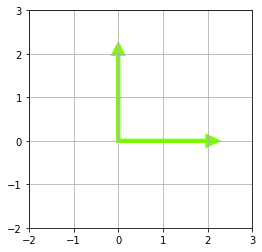

In [16]:
# Plot two vectors that are orthogonal to each other

vector_1 = [2, 0]
vector_2 = [0, 2]

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,3)          
plt.ylim(-2,3)

# Plot the vectors
for vect in [vector_1, vector_2]:
    plt.arrow(0,0, vect[0], vect[1], color = 'lawngreen',head_width=.2, head_length=0.2, linewidth=4)
plt.show()

# Synonym for orthongonal

![synonym for orthogonal](https://raw.githubusercontent.com/vjmiyagi/vjmiyagi.github.io/master/img/orthogonal.png)

While I'm sure  perpendicular is what we are going for, thinking in terms of sassy and impertinent, I have new views on things that are at 90° with each other.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [17]:
a = (-5,3,7)
b = (6,-8,2)

np.dot(a,b)

-40

a is not orthogonal to b because the dot product between them is not 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [18]:
c  =np.array([2, -15, 6, 20])
c**2

array([  4, 225,  36, 400])

In [19]:
np.dot(c,c)

665

In [20]:
cT = np.transpose(c)
cT*c

array([  4, 225,  36, 400])

Both c squared and c transposed times c = 665. 
The sum of the array elements of the dot product of c equals 665.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix}  -8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix}= 2\hat{i} + 11\hat{j} -8\hat{k}
\end{align}



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

\begin{align}
 f = \begin{bmatrix} 4\\12\\11\\9\\2 \end{bmatrix}
\end{align}


 \begin{align}
 ||f|| = \sqrt{4^2 + 12^2 + 11^2+ 9^2 + 2^2} = \sqrt{16 + 144 + 121 + 81 + 4} = \sqrt{366} = 19.131126469708992
\end{align}

In [21]:
print('The squares are:')
print(4**2,'+',12**2,'+',11**2,'+',9**2,'+',2**2)
print('The sum of the squares is :', 16 + 144 + 121 + 81 + 4)
print('The square root of 366 is :', np.sqrt(366))

The squares are:
16 + 144 + 121 + 81 + 4
The sum of the squares is : 366
The square root of 366 is : 19.131126469708992


In [37]:
f=[4,12,11,9,2]
f_hat = f/np.linalg.norm(f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [38]:
# For Curiosity sake

print(4/19.131126469708992, 12/19.131126469708992, 11/19.131126469708992,9/19.131126469708992,2/19.131126469708992)

0.20908334939572668 0.62725004818718 0.5749792108382483 0.470437536140385 0.10454167469786334


 \begin{align}
 \hat{f} = \frac{1}{||f||}f = \frac{1}{19.131126469708992}\begin{bmatrix}4\\12\\11\\9\\2 \end{bmatrix} = \begin{bmatrix} \frac{4}{19.131126469708992} \\ \frac{12}{19.131126469708992} \\ \frac{11}{19.131126469708992} \\ \frac{9}{19.131126469708992} \\  \frac{2}{19.131126469708992} \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

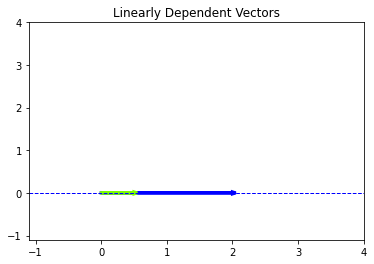

In [22]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [0.5
     ,0] 

# Scaled Vectors
v2 = np.multiply(4, v)


# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='lawngreen')


plt.title("Linearly Dependent Vectors")
plt.show()

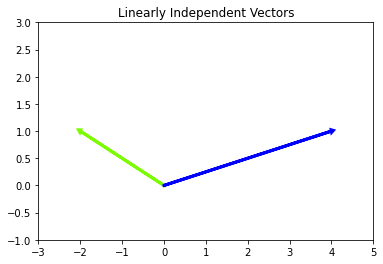

In [23]:
# Plot Linearly Independent Vectors

# Axis Bounds
plt.xlim(-3,5)          
plt.ylim(-1,3)

# Original Vector
a = [-2,1] 
b = [4, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='lawngreen')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

The span of vectors g and h is the entire 2D plane.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

The span of vectors l, m, and n is the entire 3D space.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



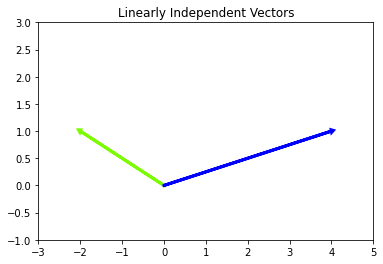

In [24]:
# Two vectors that form a basis for R^2

# Axis Bounds
plt.xlim(-3,5)          
plt.ylim(-1,3)

# Original Vector
a = [-2,1] 
b = [4, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='lawngreen')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')

plt.title("Linearly Independent Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

A basis is a set of vectors that generates all elements of the vector space and the vectors in the set are linearly independent. ... They all will have something in common: they can be write as a linear combination of some set of vectors that lies in the space. The set of vectors are called the base of the vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}         
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [25]:
P = pd.DataFrame({"A1":[1,-1,4],"A2":[2,0,8],"A3":[3,7,2]})
P


,A1,A2,A3
0,1,2,3
1,-1,0,7
2,4,8,2


In [26]:
print("Multiply 1st row by -1")
pT = P.T
pT[0] = pT[0]*-1
pT

Multiply 1st row by -1


,0,1,2
A1,-1,-1,4
A2,-2,0,8
A3,-3,7,2


In [27]:
print('Subtract 1st row from 2nd row and restore 1st row')
pT[1] = pT[1]-pT[0]
pT[0] = pT[0]*-1
pT

Subtract 1st row from 2nd row and restore 1st row


,0,1,2
A1,1,0,4
A2,2,2,8
A3,3,10,2


In [28]:
print('Multiply first row by 4')
pT[0]=pT[0]*4
pT

Multiply first row by 4


,0,1,2
A1,4,0,4
A2,8,2,8
A3,12,10,2


In [29]:
print('Subtract 1st row from 3 row and restore it')
pT[2] = pT[2]-pT[0]
pT[0] = pT[0]/4
P = pT.T
P

Subtract 1st row from 3 row and restore it


,A1,A2,A3
0,1.0,2.0,3.0
1,0.0,2.0,10.0
2,0.0,0.0,-10.0


In [30]:
print('The rank of P is 3')

The rank of P is 3


## 7.2 What does the rank of a matrix tell us?

The rank tells us how many linearly independent rows are contained in the matrix.  Because our matix P did not have any dependent rows, that is none could be reduced to all zeros, it has a rank of 3.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

\begin{align}proj_{L}(\vec{w})\end{align}

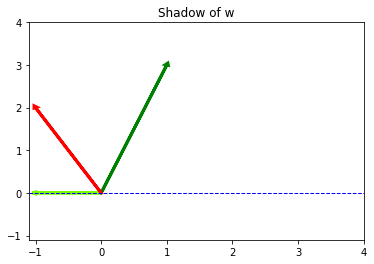

In [31]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = [-1,0]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='lawngreen')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Shadow of w")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

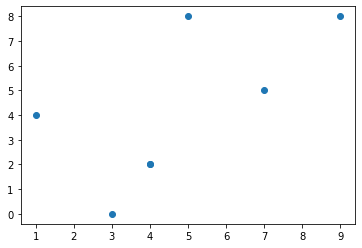

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()